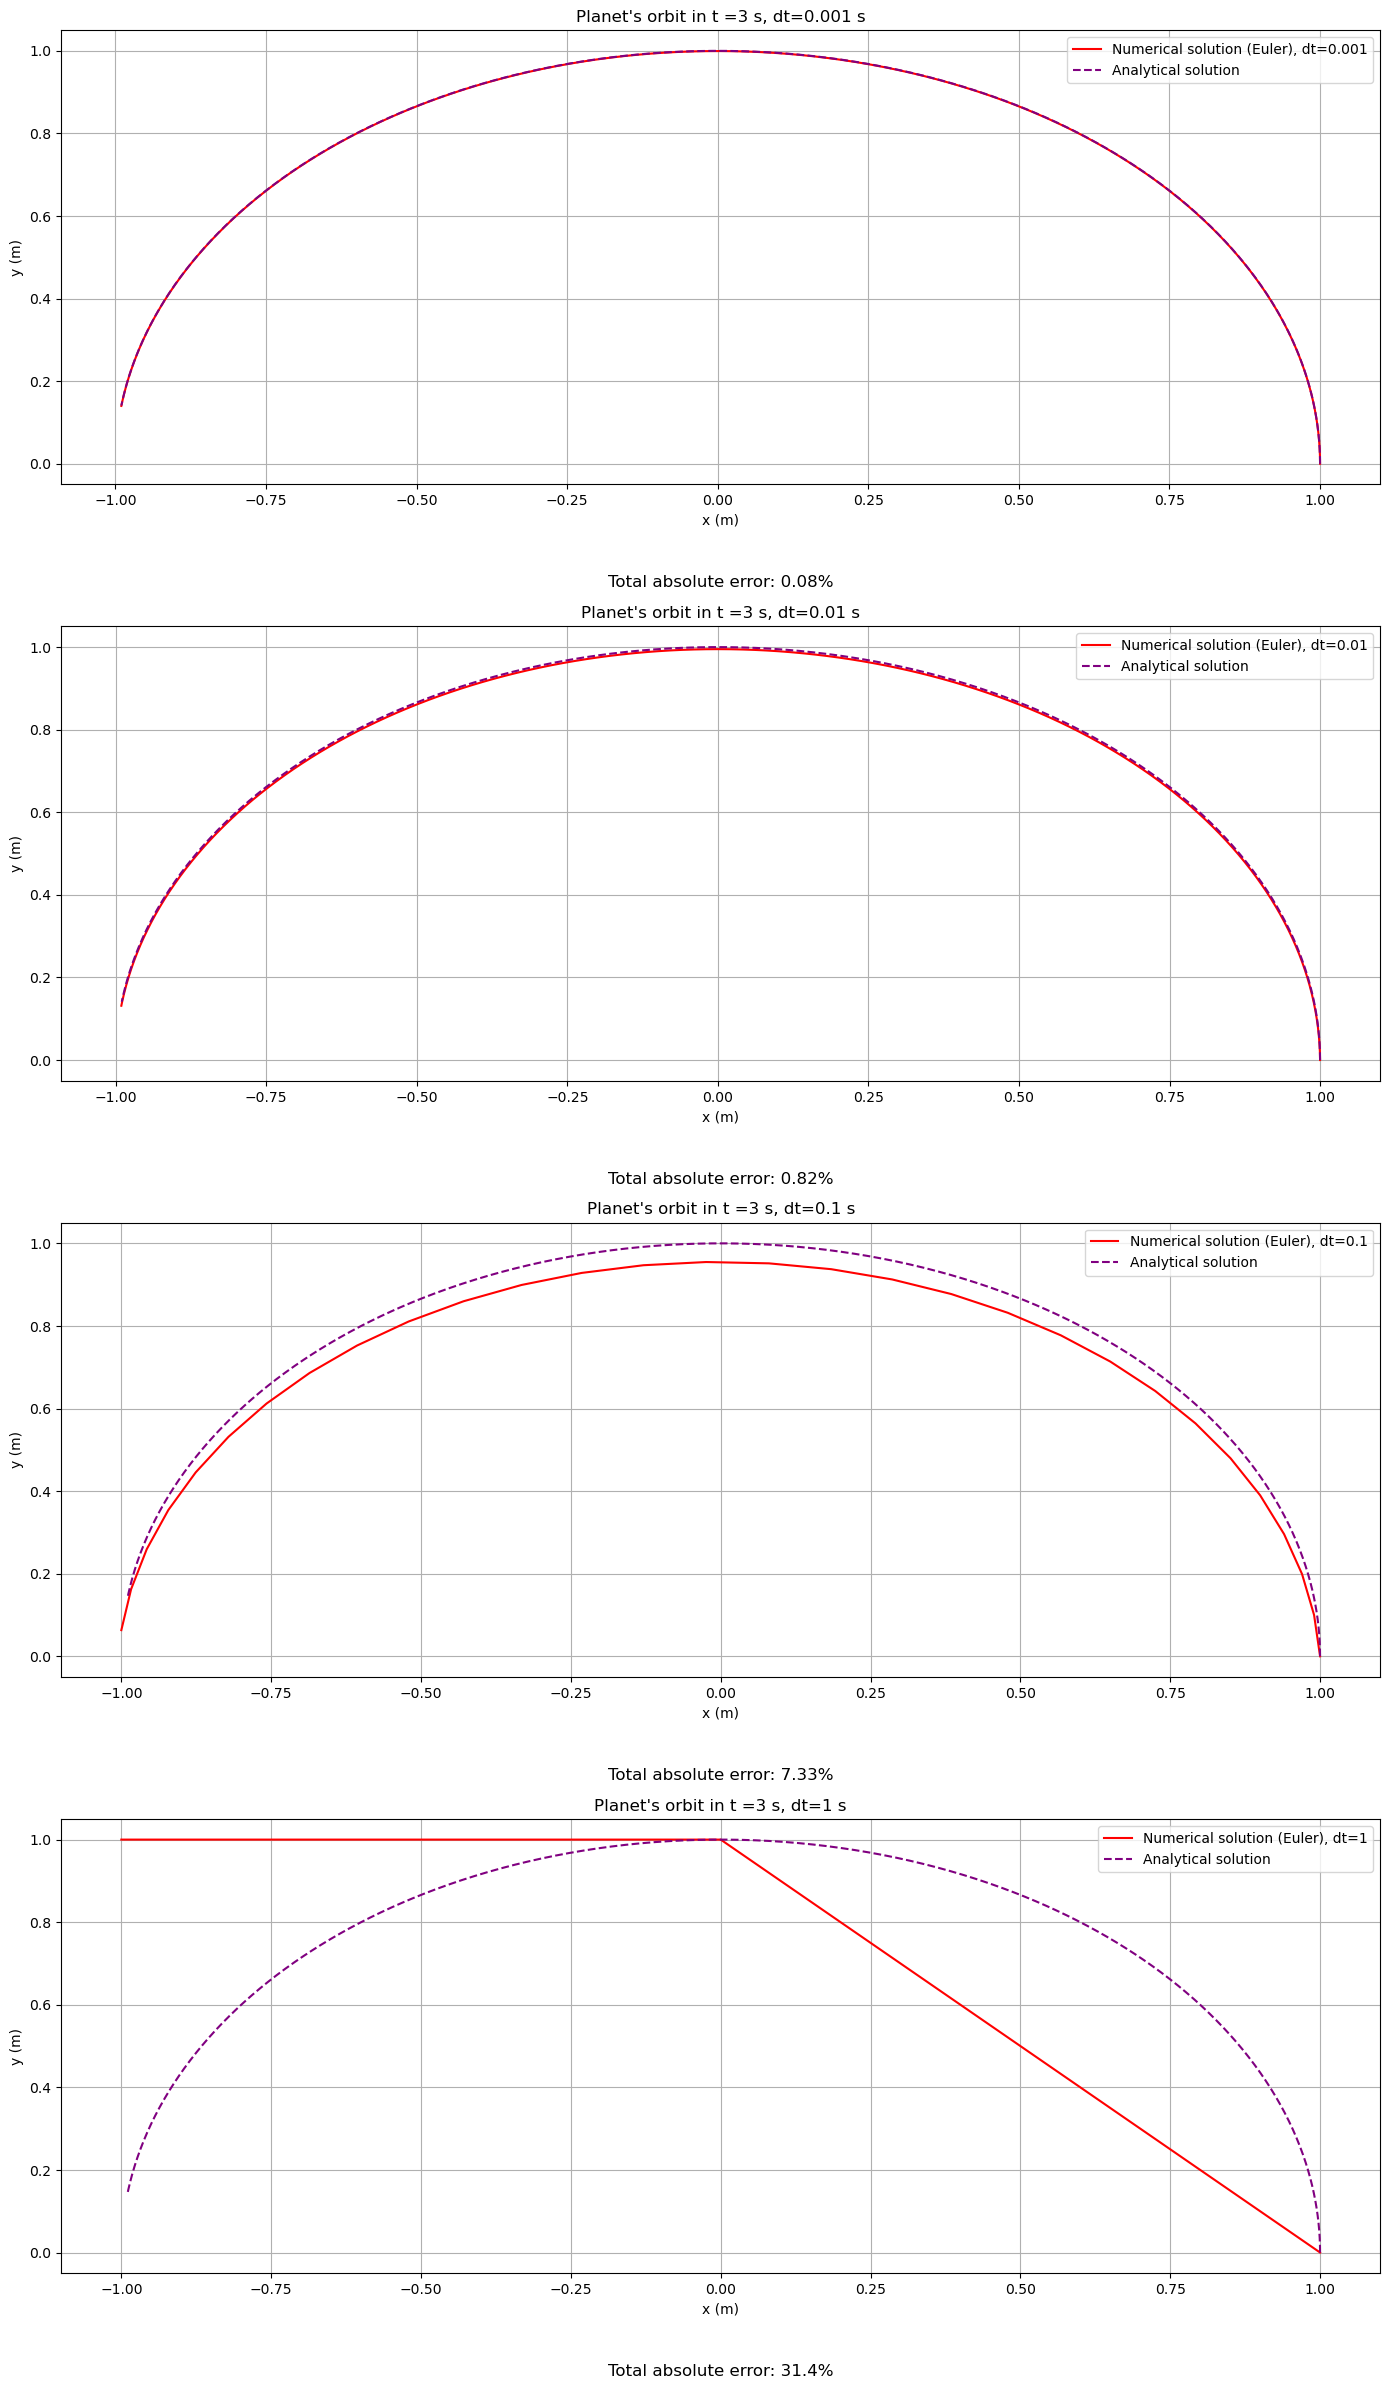

In [6]:
import numpy as np
import matplotlib.pyplot as plt

G = 1
M = 1        
R = 1         
V0 = np.sqrt(G*M/R)

valores_dt = [0.001, 0.01, 0.1,  1]  
tiempo_total =3
fig, axes = plt.subplots(len(valores_dt), 1, figsize=(14, 6 * len(valores_dt)))

for i, dt in enumerate(valores_dt):
    x = R
    y = 0
    vx = 0
    vy = V0

    pasos = int(tiempo_total / dt) 
    valores_x, valores_y = [], []        

    for _ in range(pasos):
        valores_x.append(x)
        valores_y.append(y)
        
        r = np.sqrt(x**2 + y**2)
        ax = -G * M * x / r**3
        ay = -G * M * y / r**3
        vx += ax * dt
        vy += ay * dt
        x += vx * dt
        y += vy * dt
    
    valores_x, valores_y  = np.array(valores_x), np.array(valores_y)
    
    tiempoan = np.linspace(0, tiempo_total, 1000)

    x_an = R * np.cos(tiempoan * V0 / R)
    y_an = R * np.sin(tiempoan * V0 / R)

    nvalores = len(valores_x)
    x_an_inter = np.interp(np.linspace(0, tiempo_total, nvalores), tiempoan, x_an)
    y_an_inter = np.interp(np.linspace(0, tiempo_total, nvalores), tiempoan, y_an)

    error_x = np.abs(valores_x - x_an_inter)
    error_y = np.abs(valores_y - y_an_inter)
    error_total_absoluto = np.mean(error_x + error_y)

    ax = axes[i]
    ax.plot(valores_x, valores_y, label=f'Numerical solution (Euler), dt={dt}', color='red')
    ax.plot(x_an, y_an, label='Analytical solution', linestyle='--', color='purple')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title(f'Planet\'s orbit in t ={tiempo_total} s, dt={dt} s')
    ax.legend()
    ax.grid(True)
    

    ax.text(0.5, -0.2, 
            f'Total absolute error: {round(error_total_absoluto * 100, 2)}%',
            transform=ax.transAxes,
            fontsize=12,
            verticalalignment='top',
            horizontalalignment='center')



plt.subplots_adjust(hspace=0.01)


plt.tight_layout()
plt.show()














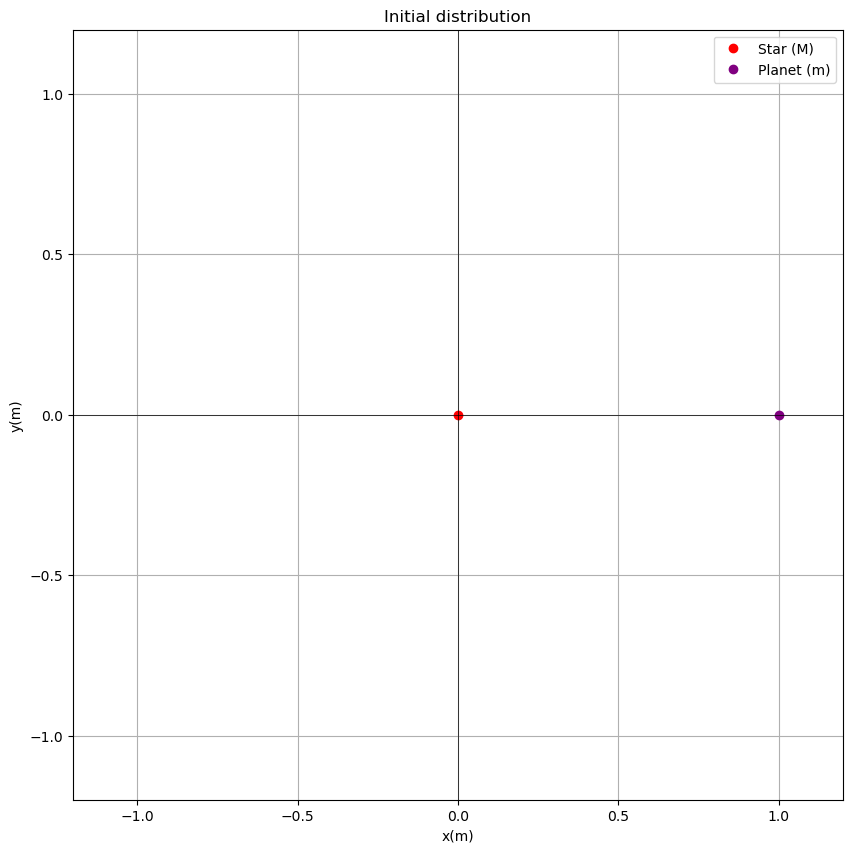

In [22]:
import matplotlib.pyplot as plt

M = 1        
R = 1

cuerpos = {
    "Star (M)": (0, 0), 
    "Planet (m)": (R, 0)   
}

fig, ax = plt.subplots(figsize=(14, 10))

for nombre, (x, y) in cuerpos.items():
    if nombre == "Star (M)":
        ax.plot(x, y, 'o', label=nombre, color='red')  
    elif nombre == "Planet (m)":
        ax.plot(x, y, 'o', label=nombre, color='purple')  

ax.set_aspect('equal')
ax.grid(True)

ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('x(m)')
ax.set_ylabel('y(m)')
ax.set_title('Initial distribution')

ax.legend()

plt.show()


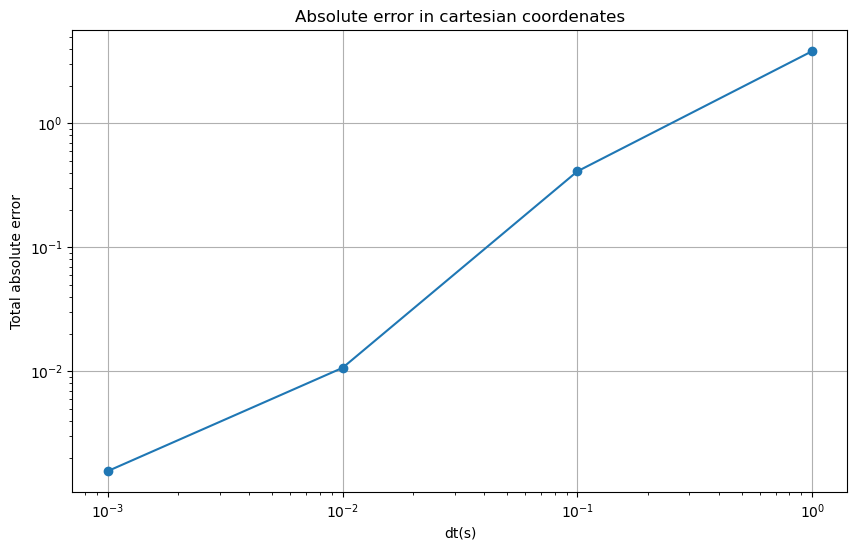

In [24]:
import numpy as np
import matplotlib.pyplot as plt

G = 1
M = 1        
R = 1         
V0 = np.sqrt(G*M/R)  

errores_totales = []


valores_dt = [0.001, 0.01, 0.1,  1]  
tiempo_total =100

for i, dt in enumerate(valores_dt):
    x = R
    y = 0
    vx = 0
    vy = V0

    pasos = int(tiempo_total / dt) 
    valores_x, valores_y = [], []        

    for _ in range(pasos):
        valores_x.append(x)
        valores_y.append(y)
        
        r = np.sqrt(x**2 + y**2)
        ax = -G * M * x / r**3
        ay = -G * M * y / r**3
        vx += ax * dt
        vy += ay * dt
        x += vx * dt
        y += vy * dt
    
    valores_x, valores_y  = np.array(valores_x), np.array(valores_y)
    
    tiempoan = np.linspace(0, tiempo_total, 1000)

    x_an = R * np.cos(tiempoan * V0 / R)
    y_an = R * np.sin(tiempoan * V0 / R)

    nvalores = len(valores_x)
    x_an_inter = np.interp(np.linspace(0, tiempo_total, nvalores), tiempoan, x_an)
    y_an_inter = np.interp(np.linspace(0, tiempo_total, nvalores), tiempoan, y_an)

    error_x = np.abs(valores_x - x_an_inter)
    error_y = np.abs(valores_y - y_an_inter)
    error_total_absoluto = np.mean(error_x + error_y)



    errores_totales.append(error_total_absoluto)

plt.figure(figsize=(10, 6))
plt.loglog(valores_dt, errores_totales, marker='o', linestyle='-')
plt.xlabel('dt(s)')
plt.ylabel('Total absolute error')
plt.title('Absolute error in cartesian coordenates')
plt.grid(True)
plt.show()












